In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("SBUX.csv", index_col="Date", parse_dates=True)

In [50]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,80.714676,4921900
2019-12-12,88.000000,88.889999,87.540001,88.209999,82.224754,10282100
2019-12-13,88.019997,88.790001,87.580002,88.669998,82.653557,6714100
2019-12-16,89.139999,89.300003,88.430000,88.779999,82.756088,6705600
2019-12-17,88.870003,88.970001,87.470001,88.129997,82.150185,7296900


In [51]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,81.977273,82.973043,80.871462,81.998656,77.197637,9.687298e+06
std,9.228221,8.946584,9.678252,9.272335,8.909895,5.131906e+06
min,55.549999,57.439999,50.020000,56.330002,52.752609,1.847800e+06
25%,75.370003,76.370003,74.430000,75.440002,71.048233,6.197700e+06
50%,82.599998,83.239998,81.750000,82.410004,78.034676,8.238600e+06
75%,88.500000,89.110001,87.720001,88.510002,82.949127,1.137890e+07
max,103.510002,106.089996,102.750000,105.389999,100.265205,2.877060e+07


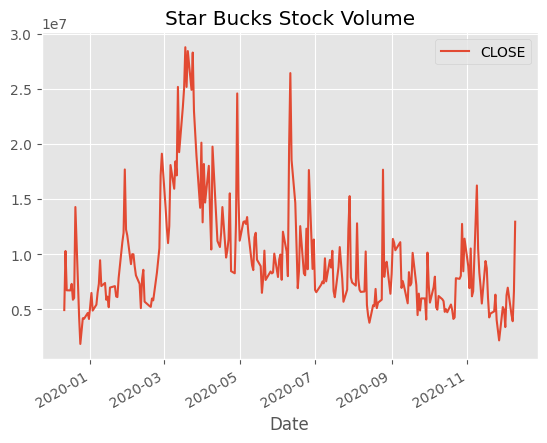

In [53]:
plt.style.use("ggplot")
df["Volume"].plot(label="CLOSE", title="Star Bucks Stock Volume")
# df["Adj Close"].plot(label="OPEN", title="Star Bucks Stock Volume")
plt.legend()

In [54]:
# Won't dive into data exploration here
# just here to see lstm in action

# DATA PREPROCESSING

In [55]:
df.iloc[:, :-1] # every row with columns except the last column 
# df.loc[:, :"Adj Close"] # loc is inclusive on both ends

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,80.714676
2019-12-12,88.000000,88.889999,87.540001,88.209999,82.224754
2019-12-13,88.019997,88.790001,87.580002,88.669998,82.653557
2019-12-16,89.139999,89.300003,88.430000,88.779999,82.756088
2019-12-17,88.870003,88.970001,87.470001,88.129997,82.150185
...,...,...,...,...,...
2020-12-04,101.349998,102.940002,101.070000,102.279999,97.306427
2020-12-07,102.010002,102.220001,100.690002,101.410004,96.478737
2020-12-08,100.370003,101.570000,100.010002,101.209999,96.288452


In [56]:
# df.iloc[:, -1:] # selecting the last column
# df.iloc[:, 5:6] # iloc is exclusive


In [57]:
# Separating data and labels
X = df.iloc[:, :-1]
y = df.iloc[:, 5:6]

- StandardScalar for the features, mean 0 and standard deviation 1: (X - mean)/ sd
    - This ensures that our features have a standard distribution and they are on a similar scale
    - The features will be **centered around zero and have similar scales**, **making them more comparable and potentially improving the performance** of machine learning algorithms that are **sensitive to feature scaling**
---
- MinMaxScalar for output values, (x - min) / (max - min)
    - Beneficial where preserving the original range or distribution of the feature is important
    - The normalization process ensures that all the features have a similar scale and bounded within a specific range
> With this the value will be scaled between 0 and 1

In [58]:
# ! pip install scikit-learn

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
mm = MinMaxScaler()
ss = StandardScaler()

In [61]:
X_ss= ss.fit_transform(X)
y_mm = mm.fit_transform(y)

In [62]:
(X_ss[:10], X[:10])

(array([[0.46501033, 0.43644414, 0.51542403, 0.49614696, 0.39551652],
        [0.6539359 , 0.66267575, 0.69038876, 0.67120687, 0.56533573],
        [0.65610714, 0.65147637, 0.69453003, 0.72091504, 0.61355773],
        [0.77771476, 0.70859458, 0.78252968, 0.73280192, 0.62508808],
        [0.74839912, 0.67163566, 0.68314171, 0.66256174, 0.5569499 ],
        [0.69628123, 0.65819579, 0.71937685, 0.64743324, 0.54227412],
        [0.63547785, 0.62907659, 0.69453003, 0.70470572, 0.59783261],
        [0.73971266, 0.67499543, 0.72662379, 0.69822224, 0.59154198],
        [0.72125461, 0.65819579, 0.75664737, 0.67336854, 0.56743272],
        [0.67565119, 0.63019678, 0.73801211, 0.70470572, 0.59783261]]),
                  Open       High        Low      Close  Adj Close
 Date                                                             
 2019-12-11  86.260002  86.870003  85.849998  86.589996  80.714676
 2019-12-12  88.000000  88.889999  87.540001  88.209999  82.224754
 2019-12-13  88.019997  88.790

In [63]:
(y_mm[:10], y[:10])

(array([[0.11418203],
        [0.31327722],
        [0.18075014],
        [0.18043443],
        [0.20239722],
        [0.14899639],
        [0.15504702],
        [0.46145646],
        [0.09292867],
        [0.        ]]),
               Volume
 Date                
 2019-12-11   4921900
 2019-12-12  10282100
 2019-12-13   6714100
 2019-12-16   6705600
 2019-12-17   7296900
 2019-12-18   5859200
 2019-12-19   6022100
 2019-12-20  14271500
 2019-12-23   4349700
 2019-12-24   1847800)

# Splitting the dataset into 2 parts, training and testing
- The data is sequential so the order matters, hence we will split the dataset

In [64]:
# first 200 for training

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_mm[:200, :]
y_test = y_mm[200:, :]

In [65]:
X.shape

(253, 5)

In [66]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


# Changing the numpy arrays into Tensors
- Pytorch works with tensors

In [67]:
# ! pip3 install torch --index-url https://download.pytorch.org/whl/cu118

In [68]:
import torch
import torch.nn as nn
from torch.autograd import Variable # Variabled can be differentiated

In [69]:
# X_train_tensors = Variable(torch.Tensor(X_train))
# X_test_tensors = Variable(torch.Tensor(X_test))
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

# Check the input Format of an LSTM
- Since LSTM is specially built for sequential data, it cannot take in simple 2-D data as input
- They need to have the timestamp information with them too
- We need to have input at each timestamp
- We'll convert our tensor from 2D (samples X features) to 3D (samples X 1 X features)

In [70]:
X_train_tensors.shape

torch.Size([200, 5])

In [71]:
# reshaping to rows, timestamps, features
# [0]: same number of samples
# 2nd dimen size 1 timestamp
# 3rd dimen same size as the features
X_train_tensors_final = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))


In [72]:
X_test_tensors_final.shape, X_train_tensors_final.shape

(torch.Size([53, 1, 5]), torch.Size([200, 1, 5]))

In [73]:
y_test_tensors.shape, y_test_tensors.shape

(torch.Size([53, 1]), torch.Size([53, 1]))

## Forward pass
- Define the hidden state, and internal state first, initialized with zeros.
- we'll pass the hidden state and internal state in LSTM along with the input at the current timestamp **t**
- this'll return a new hidden state(hnn), current state(cnn) and output(output)
- we'll reshape the output so that it can pass to a Dense Layer
- Next, simply apply activations, and pass them to the dense layers, and return the output

In [74]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes # no. of classes
        self.num_layers = num_layers # no. of layers)
        self.input_size = input_size # input size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True
                            )
        self.fc_1 = nn.Linear(hidden_size, 128) # fully connected 1
        self.fc = nn.Linear(128, num_classes) # fully connected last layer
        
        self.relu = nn.ReLU()

    def forward(self, x):
        # hidden state
        # 1 X 250 X 2: in our use case
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) 
        # internal state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # Propagate input through LSTM
        # lstm with input, hidden and internal state
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        # reshaping the data for Dense layer
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out)
        out = self.fc(out) # final output
        return out

In [75]:
num_epochs = 1000
learning_rate = 0.00

input_size = 5
hidden_size = 2
num_layers = 1 # no. of stacked lstm layers

num_classes = 1 # no. of output classes

In [76]:
lstm1 = LSTM1(
    num_classes=num_classes, input_size=input_size,
    hidden_size=hidden_size, num_layers=num_layers,
    seq_length=X_train_tensors_final.shape[1])
print(lstm1)

LSTM1(
  (lstm): LSTM(5, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)


In [77]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [78]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0

    # obtain the loss function
    loss = criterion(outputs, y_train_tensors)

    loss.backward() #calculates the loss of the loss function

    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.04718
Epoch: 100, loss: 0.04718


Epoch: 200, loss: 0.04718
Epoch: 300, loss: 0.04718
Epoch: 400, loss: 0.04718
Epoch: 500, loss: 0.04718
Epoch: 600, loss: 0.04718
Epoch: 700, loss: 0.04718
Epoch: 800, loss: 0.04718
Epoch: 900, loss: 0.04718


# Making Predictions
- To make prediction on whole dataset, we'll need to bring the original dataset into the model suitable format

In [87]:
df_X_ss = ss.transform(df.iloc[:, :-1])
df_y_mm = mm.transform(df.iloc[:, -1:])

df_X_ss = Variable(torch.Tensor(df_X_ss)) # converting to tensors
df_y_mm = Variable(torch.Tensor(df_y_mm)) # converting to tensors

# reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))


- we'll perform perdictions on the whole dataset via a forward pass
- for plotting them (by converting them(predictions) to numpy)
    - reverse transform them (we transformed labels to check the actual answer, also reverse transform them)
    - inverse transform the predictions to make them in the same scale as the data we get from the csv
- plot it

In [81]:
train_predict = lstm1(df_X_ss) # forward pass
data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()



In [82]:
data_predict[:10]

array([[0.24291077],
       [0.24867406],
       [0.24867406],
       [0.24867406],
       [0.24867406],
       [0.24867406],
       [0.24867406],
       [0.24867406],
       [0.24867406],
       [0.24867406]], dtype=float32)

In [83]:
data_predict = mm.inverse_transform(data_predict) # reverse transform
data_predict[:10]

array([[8387638.5],
       [8542802. ],
       [8542802. ],
       [8542802. ],
       [8542802. ],
       [8542802. ],
       [8542802. ],
       [8542802. ],
       [8542802. ],
       [8542802. ]], dtype=float32)

In [84]:
dataY_plot[:10]

array([[0.11418203],
       [0.3132772 ],
       [0.18075015],
       [0.18043442],
       [0.20239723],
       [0.14899638],
       [0.15504703],
       [0.46145645],
       [0.09292867],
       [0.        ]], dtype=float32)

In [85]:
dataY_plot = mm.inverse_transform(dataY_plot)
dataY_plot[:10]

array([[ 4921900. ],
       [10282100. ],
       [ 6714100. ],
       [ 6705599.5],
       [ 7296900.5],
       [ 5859199.5],
       [ 6022100. ],
       [14271500. ],
       [ 4349700. ],
       [ 1847800.1]], dtype=float32)

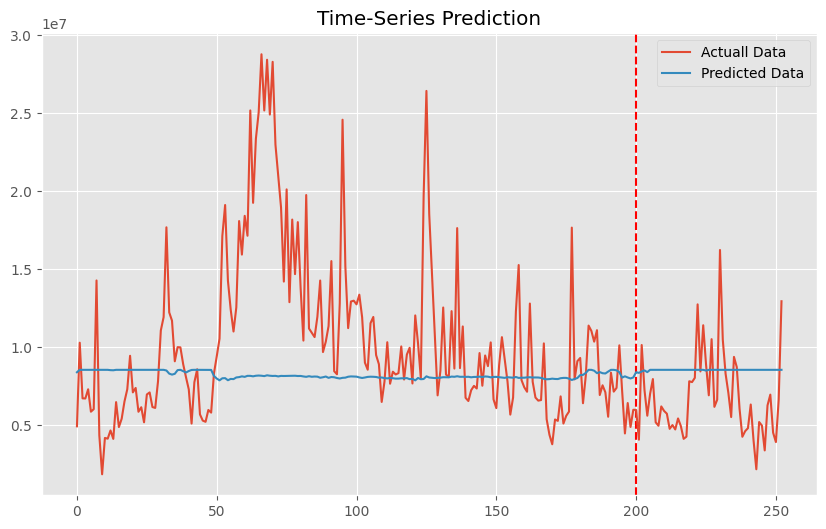

In [86]:
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 